In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/siwatis/Credit-Analysis-Prediction/main/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [13]:
# Columns name: replace widespaces
df.columns = [col.replace(' ','') for col in df.columns]

# Drop loan_id column
df.set_index('loan_id', inplace=True)

# Set data type to each variables and clean space for categorical variable
categorical_col = ['no_of_dependents','education','self_employed','loan_term','loan_status']
measure_col = ['income_annum','loan_amount','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value','loan_term']
for col in categorical_col:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].astype('category')
for col in measure_col:
    df[col] = df[col].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4269 entries, 1 to 4269
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   no_of_dependents          4269 non-null   category
 1   education                 4269 non-null   category
 2   self_employed             4269 non-null   category
 3   income_annum              4269 non-null   float64 
 4   loan_amount               4269 non-null   float64 
 5   loan_term                 4269 non-null   float64 
 6   cibil_score               4269 non-null   float64 
 7   residential_assets_value  4269 non-null   float64 
 8   commercial_assets_value   4269 non-null   float64 
 9   luxury_assets_value       4269 non-null   float64 
 10  bank_asset_value          4269 non-null   float64 
 11  loan_status               4269 non-null   category
dtypes: category(4), float64(8)
memory usage: 317.4 KB


In [16]:
df.describe().map('{:,.2f}'.format)

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,"4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00"
mean,"5,059,123.92","15,133,450.46",10.90,599.94,"7,472,616.54","4,973,155.31","15,126,305.93","4,976,692.43"
std,"2,806,839.83","9,043,362.98",5.71,172.43,"6,503,636.59","4,388,966.09","9,103,753.67","3,250,185.31"
min,"200,000.00","300,000.00",2.00,300.00,"-100,000.00",0.00,"300,000.00",0.00
25%,"2,700,000.00","7,700,000.00",6.00,453.00,"2,200,000.00","1,300,000.00","7,500,000.00","2,300,000.00"
50%,"5,100,000.00","14,500,000.00",10.00,600.00,"5,600,000.00","3,700,000.00","14,600,000.00","4,600,000.00"
75%,"7,500,000.00","21,500,000.00",16.00,748.00,"11,300,000.00","7,600,000.00","21,700,000.00","7,100,000.00"
max,"9,900,000.00","39,500,000.00",20.00,900.00,"29,100,000.00","19,400,000.00","39,200,000.00","14,700,000.00"


In [17]:
df_measure_melt = df[measure_col + ['loan_status']].melt(id_vars='loan_status')

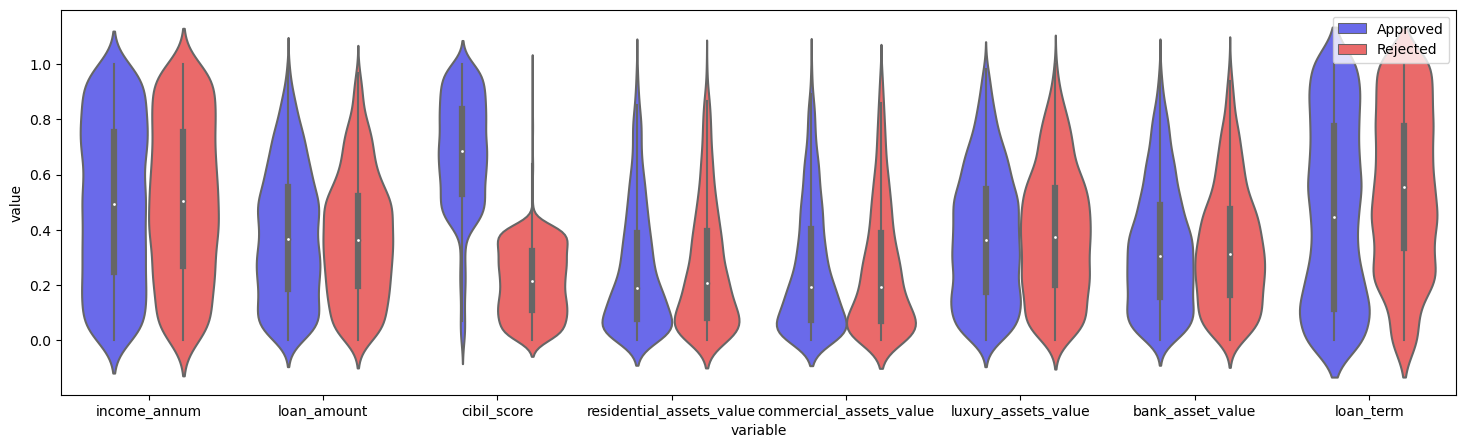

In [18]:
def normalize(data, column_name=measure_col, include_target=True):
    data_ = data[column_name].copy()
    for col in data_.columns:
        data_[col] = (data_[col] - data_[col].min())/(data_[col].max() - data_[col].min())
    if include_target:
        data_['loan_status'] = data['loan_status']
    return data_

df_normalized_melt = normalize(df).melt(id_vars='loan_status')

plt.subplots(figsize=[18,5])
sns.violinplot(data=df_normalized_melt, x='variable', y='value', hue='loan_status', palette='seismic')
plt.legend(loc='upper right')
plt.show()

In [20]:
df_normalized_melt \
    .pivot_table(index='loan_status', columns='variable', values='value', aggfunc='median') \
    .transpose()

C:\Users\FWX PC\AppData\Local\Temp\ipykernel_9776\3546753791.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index='loan_status', columns='variable', values='value', aggfunc='median') \


loan_status,Approved,Rejected
variable,,
bank_asset_value,0.306122,0.312925
cibil_score,0.685000,0.215000
commercial_assets_value,0.190722,0.190722
income_annum,0.494845,0.505155
loan_amount,0.364796,0.362245
loan_term,0.444444,0.555556
luxury_assets_value,0.362468,0.372751
residential_assets_value,0.188356,0.205479


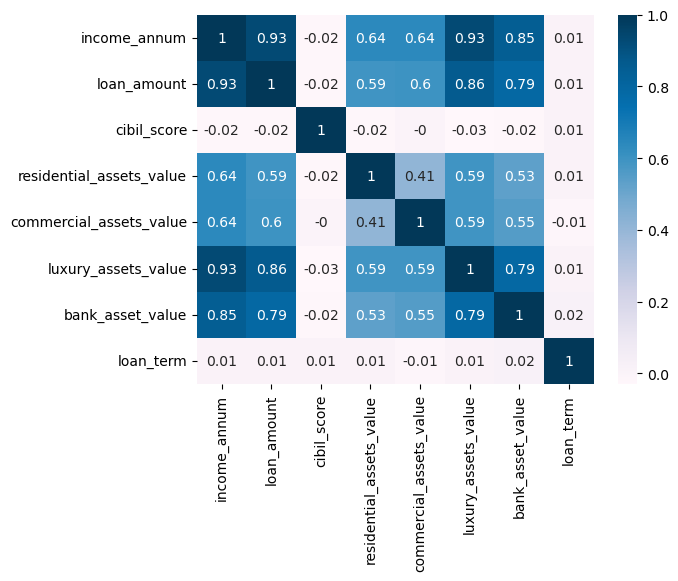

In [24]:
sns.heatmap(round(df[measure_col].corr(), 2), cmap='PuBu', annot=True);

